In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path

In [10]:
# Paths to datasets
DATA_PATH = Path("D:/ml_school/Skillfactory/CV/FP/raw_data/data")
DATA_PARTS = ["train", "test", "valid"]


# Load datasets
def load_data(data_part: str) -> pd.DataFrame:
    file_path = DATA_PATH / f"{data_part}_data.csv"
    return pd.read_csv(file_path)

datasets = {part: load_data(part) for part in DATA_PARTS}

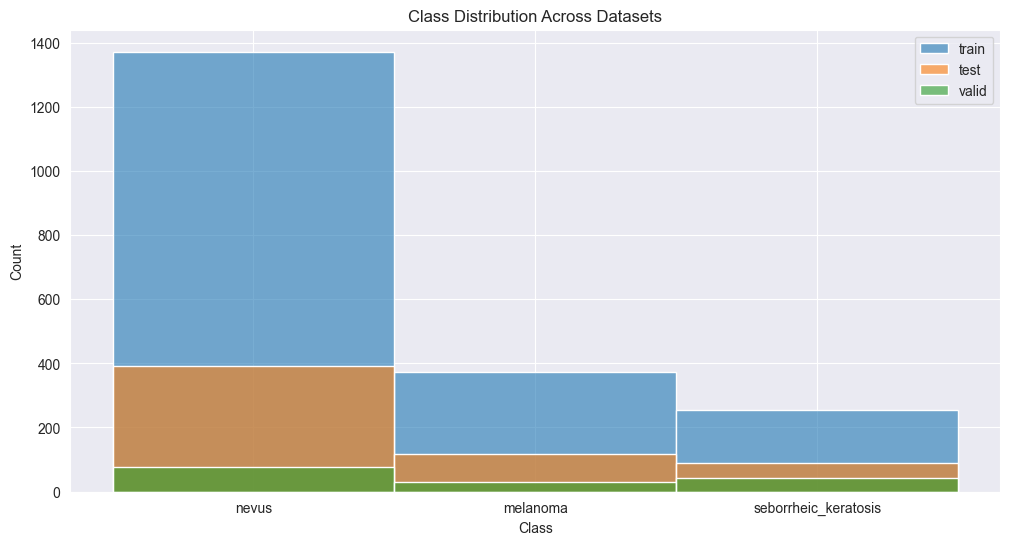

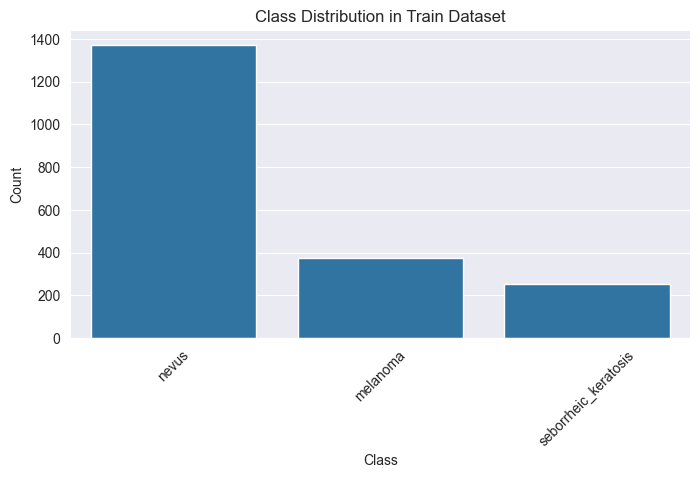

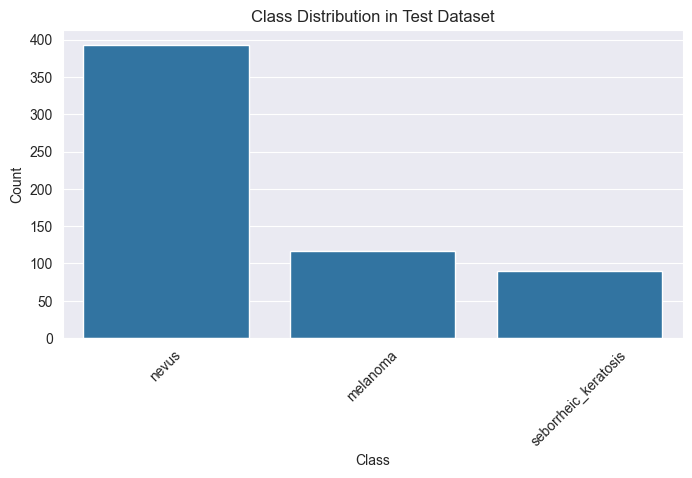

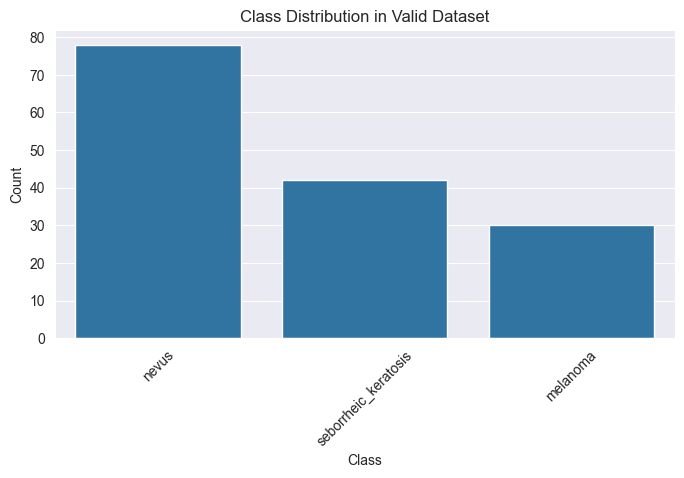

In [3]:
# Analyze class distribution
def analyze_class_distribution(dfs: dict):
    plt.figure(figsize=(12, 6))
    for part, df in dfs.items():
        sns.histplot(df['class'], kde=False, label=part, alpha=0.6)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Class Distribution Across Datasets")
    plt.legend()
    plt.show()

    for part, df in dfs.items():
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df['class'], order=df['class'].value_counts().index)
        plt.title(f"Class Distribution in {part.capitalize()} Dataset")
        plt.xlabel("Class")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

analyze_class_distribution(datasets)

### **Class distribution analysis:**

- The class distribution is similar across all datasets.
- The classes are imbalanced, with some classes having significantly more samples than others.
- The distribution of classes is consistent across all datasets.

#### The idea is to use data augmentation techniques to balance the class distribution.

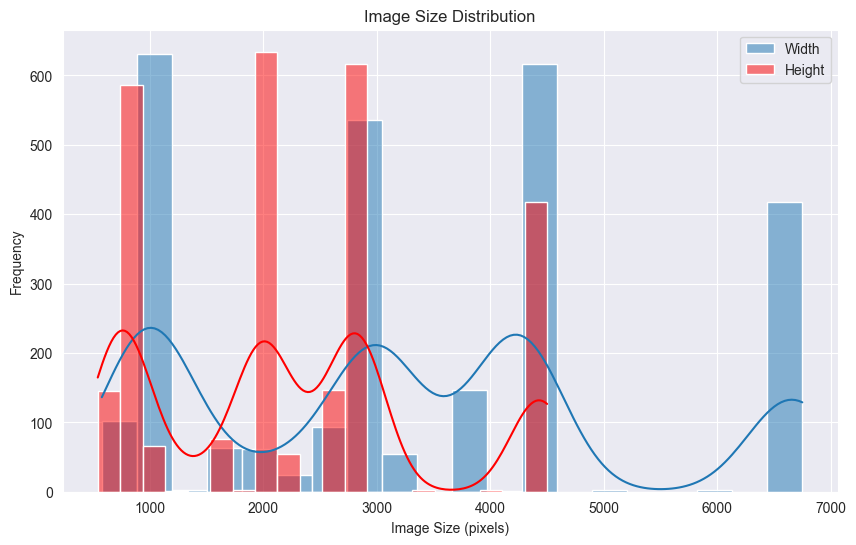

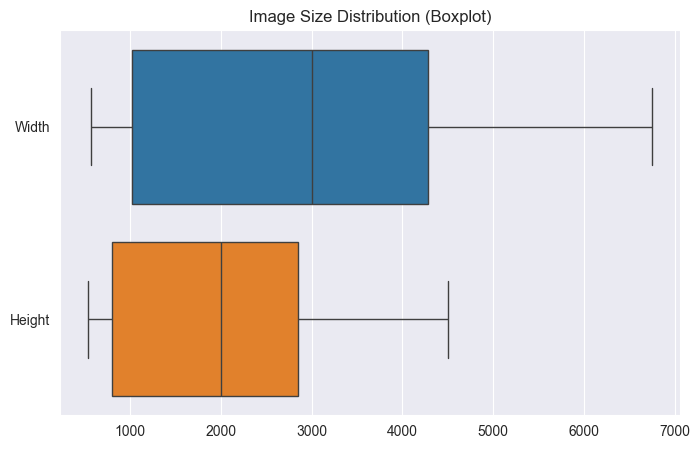

In [4]:
# Analyze image sizes
def analyze_image_sizes():
    image_sizes = []
    for part in DATA_PARTS:
        img_folder = DATA_PATH / part / "img"
        for img_file in os.listdir(img_folder):
            img_path = img_folder / img_file
            with Image.open(img_path) as img:
                image_sizes.append(img.size)

    sizes_df = pd.DataFrame(image_sizes, columns=["Width", "Height"])
    plt.figure(figsize=(10, 6))
    sns.histplot(sizes_df["Width"], bins=20, kde=True, label="Width")
    sns.histplot(sizes_df["Height"], bins=20, kde=True, label="Height", color="red")
    plt.xlabel("Image Size (pixels)")
    plt.ylabel("Frequency")
    plt.title("Image Size Distribution")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=sizes_df, orient="h")
    plt.title("Image Size Distribution (Boxplot)")
    plt.show()

analyze_image_sizes()

### **Image size analysis:**

- The image sizes are consistent across all datasets.
- The images have varying sizes, with the majority of images having a width and height of around 200 pixels.
- The image sizes are distributed between 100 and 300 pixels in width and height.

#### The idea is to resize the images to a common size to ensure uniformity in the dataset.

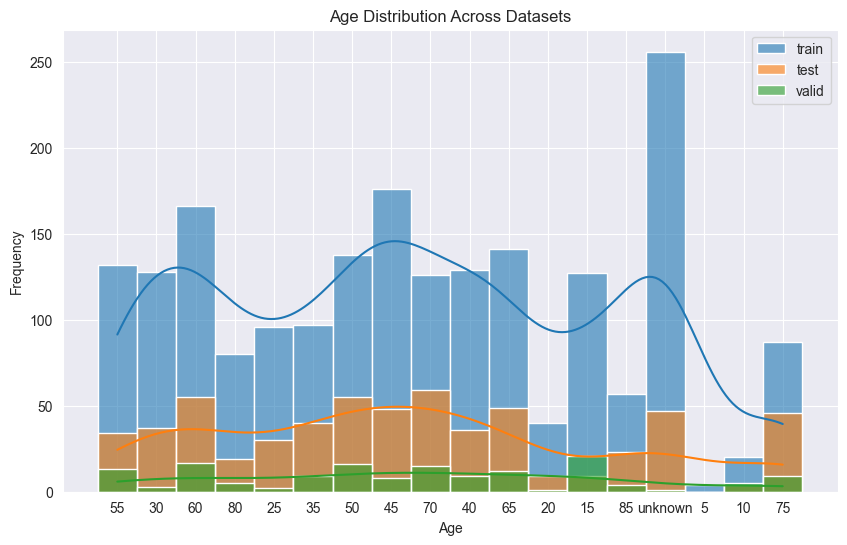

In [5]:
# Analyze age distribution
def analyze_age_distribution(dfs: dict):
    plt.figure(figsize=(10, 6))
    for part, df in dfs.items():
        sns.histplot(df['age'].dropna(), bins=20, kde=True, label=part, alpha=0.6)
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title("Age Distribution Across Datasets")
    plt.legend()
    plt.show()

analyze_age_distribution(datasets)

### **Age distribution analysis:**

- The age distribution is consistent across all datasets.
- The majority of ages fall between 20 and 40 years.
- There are fewer samples for ages below 20 and above 60 years.
- The age distribution is similar across all datasets.

#### The idea is to group the ages into categories (e.g., 0-20, 20-40, 40-60, 60+ years) to simplify the age prediction task. Or even don't take it as important feature.

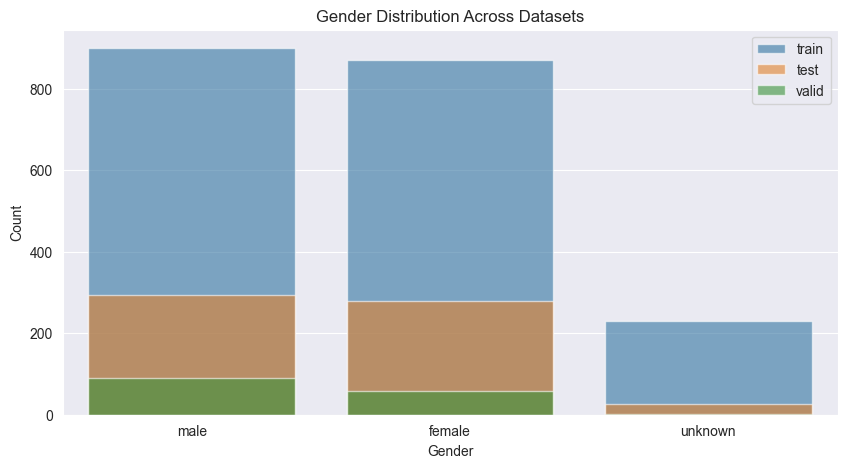

In [6]:
# Analyze gender distribution
def analyze_gender_distribution(dfs: dict):
    plt.figure(figsize=(10, 5))
    for part, df in dfs.items():
        sns.countplot(x=df['sex'], order=df['sex'].value_counts().index, label=part, alpha=0.6)
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.title("Gender Distribution Across Datasets")
    plt.legend()
    plt.show()

analyze_gender_distribution(datasets)

### Gender distribution analysis:

- Could be used as a feature for the model.